Workshop 1: Pete Hellyer - edited from Dragos Gruia and Valentina Giunchiglia

# Introduction to structural and functional MRI analysis in Python

The aim of the today's workshop is to introduce you to the concept of of structural and functional MRI data using Python.

- **Structural MRI**: provides information about the anatomy and pathology of the brain
- **Functional MRI**: provides information about the brain activity

In the workshop today, we will start to teach you how to manage and understand these imaging data and how they are constructed.


The data for the lecture of today are saved in the format of a `pickle` object. Pickle is a module in python that can be used to store and save python objects, in the `pickle` format. The first thing you need to do is to import the module, together with other modules you will need in the workshop.

In [5]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pickle
import seaborn as sb
import pandas as pd
%matplotlib inline
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

sb.set_theme("talk")
sb.set_style("whitegrid")

To open and save python objects in the pickle format, you need to use `context managers`, which you should have learnt during the first lecture of the primer material. Let's start by loading the fMRI (functional MRI) and sMRI (structural MRI) data.

In [6]:
with open('Data/fmri_day4.pickle', 'rb') as handle:
    fmri = pickle.load(handle)
    
with open('Data/smri_day4.pickle', 'rb') as handle:
    smri = pickle.load(handle)

## Visualize and understand sMRI data

Let's start by looking at the sMRI data. The first thing we can do is to check out the shape and type of the object.

In [7]:
smri.shape, type(smri)

((256, 256, 54), numpy.ndarray)

As you can see `smri` is a 3 dimensional array, with dimensions 256, 256 and 54. The reason why we have 3D is that the brain is in 3D! When we represent and study the brain, we can consider it in terms of **voxels**. Voxels represent a tiny cube of brain tissue and correspond to the smallest piece you can split a brain into at the resolution of the image data. To understand this better, look at the following figure. Each one of these small cube is a voxel. If you want to specify the exact location of the voxel in the brain, since it is in 3D, you have to provide the x, y and z coordinates, which correspond to the 3 dimensions of your array. 

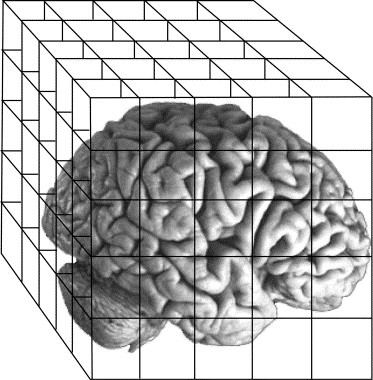

**What are these dimensions?**

You can imagine that the brain is made up of multible brain slices. Each one of these brain slices is a 2D plane. This is where the x and y dimension come from, which tell you where in the plane the voxel is located. You can also think of the x and y coordinates as the width and height of a brain slice. If you put all these separate slices together, you get the 3D brain. The z dimension specifies to which slice of the brain the voxel belongs.

The values of the array represent the signal of each voxel, the higher is the number, the stronger is the signal. In Python, if you want to extract the signal of a specific voxel, you have to provide exact x, y and z coordinates. Let's try to extract the signal in x=100, y=100 and z=10.

In [8]:
smri[100, 100, 10]

832.0

You always have to provide the x, y and z coordinates in this order.

Now try to change the values to x = 20, y = 20 and z = 10. Why do you think that is the result you get?

In [15]:
# x= 20
smri[20, 20, 20]

# nb. this voxel has no data in it - it is outside the brain hence the value you get is 0

0.0

When we think about sMRI images, however, we are more interested in extracting collection of voxels, maybe a 2D brain slice or a 1D set of voxels. 
If you want to extract all voxels along the x axis, then you have to select all values in x. If you remember from the primer, you can do that by using `:`.

In [16]:
smri[:, 100, 10]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,   40.,   40.,   24.,    8.,
         40.,    8.,   40.,   24.,    0.,   40.,   32.,   32.,    0.,
         16.,   40.,   24.,   24.,   32.,   56.,   40.,  216.,  808.,
        944.,  776.,  768.,  664.,  480.,  288.,  176.,  440.,  712.,
        720.,  776.,  840.,  736.,  312.,   40.,   32.,   56.,   72.,
        120.,  320.,  464.,  416.,  344.,  464.,  536.,  384.,  296.,
        544.,  608.,  576.,  672.,  624.,  552.,  624.,  624.,  600.,
        720.,  760.,  768.,  824.,  824.,  792.,  792.,  840.,  832.,
        848.,  832.,  832.,  864.,  880.,  896.,  888.,  920.,  944.,
        920.,  920.,  920.,  936.,  928.,  888.,  912.,  904.,  920.,
        872.,  816.,  856.,  808.,  728.,  712.,  736.,  712.,  536.,
        472.,  520.,

How should you change the code to extract all values along the y axis, and the z axis?
Try to check the shapes of these arrays. Is it as you expect it? Why?

In [21]:
# y axis
yaxis = smri[100, :, 10]
yaxis.shape

# this value is the same as the number of voxels in the y axis

(256,)

In [20]:
# z axis
zaxis = smri[100, 100, :]
zaxis.shape

# this value is the same as the number of voxels in the z axis


(54,)

Now let's try to extract an entire brain slice in 2D. When you look at the brain, you can think of three possible planes: sagittal, coronal and axial, as shown in the Figure. 
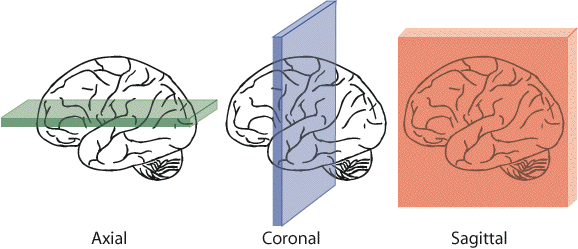

Let's try to visualize these planes in our images. To visualize 2D arrays in python, matplotlib has a ready to use function called  `imshow ` that takes as an argument the 2D array, together with additional arguments about, for example, the colour map to use (`cmap`)

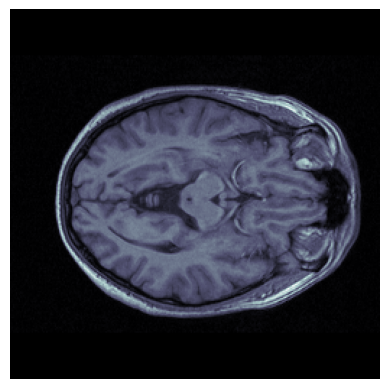

In [22]:
plt.imshow(smri[:,:,20], cmap='bone')
_ = plt.axis("off")

This image is a slice of the brain in the axial plane 

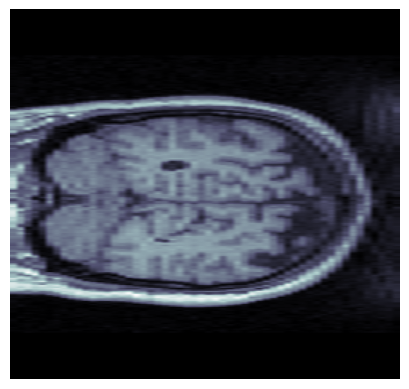

In [25]:
plt.imshow(smri[:,80,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

This image is a slice of the brain in the coronal plane

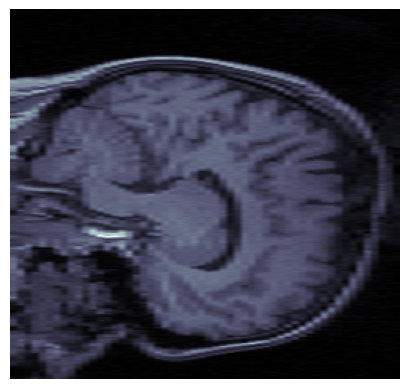

In [26]:
plt.imshow(smri[120,:,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

This image is a slice of the brain in the sagittal plane

Can you understand which plane each image represents?

-------
### Code here

Let's try to see what happens if you change the coordinate number along one of the planes of your choice. Plot a figure with 6 suplots where each suplot represents a 2D section of the brain at different coordinates.
Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

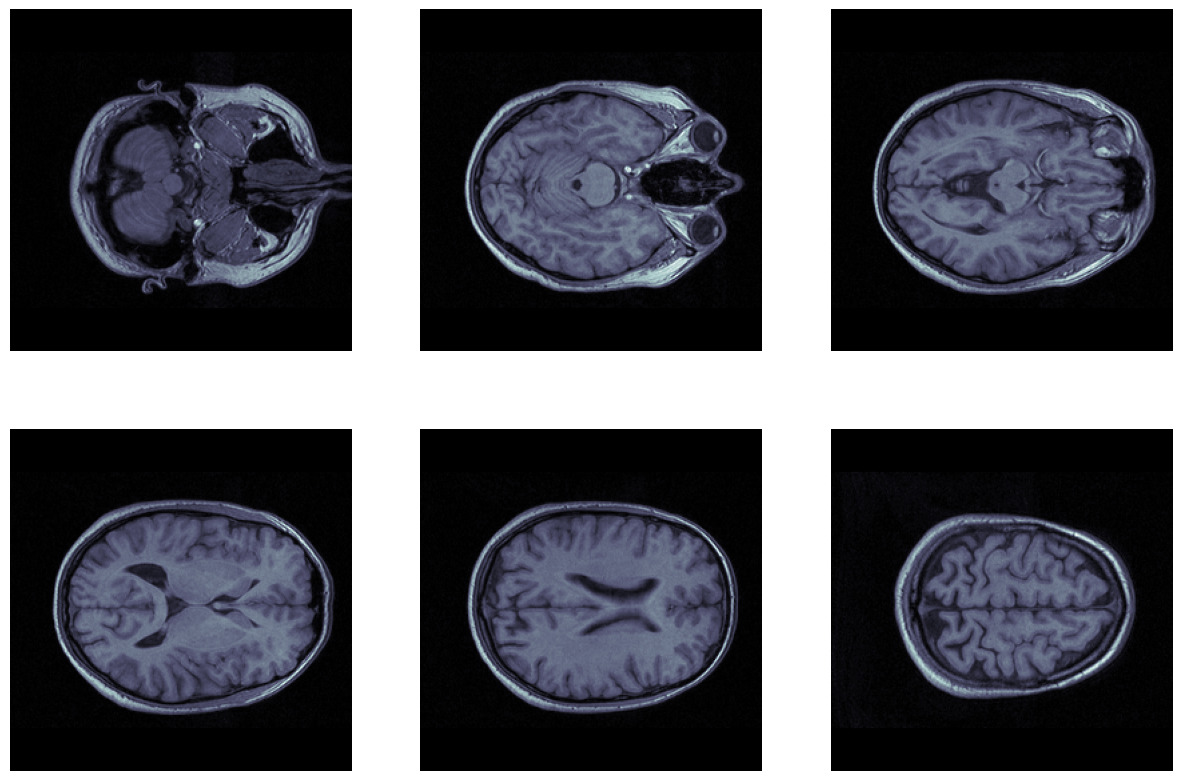

In [37]:
## we can use enumerate to loop through a list of coordinates and plot them
plt.figure(figsize = (15, 10))

for i,x in enumerate([5,15,20,25,30,40]):
    plt.subplot(2,3,i+1) # note here, that we have to add 1 to the index, as the index starts at 0 but the subplot number starts at 1
    plt.imshow(smri[:,:,x], cmap='bone')
    plt.axis("off")

# n.b. you were introduced to subplots in the primer material (Lecture 9), you can use this to create a figure with multiple subplots
# enumerate was introduced in the primer material (Lecture 5), you can use this to loop through a list of coordinates and plot them

------

## Visualize and understand fMRI data

Let's start by looking at the shape of fMRI data. How is it different from sMRI?

In [38]:
fmri.shape

(16, 16, 16, 96)

As you can see, fMRI data are 4 dimensional arrays. The first three dimensions are the same as sMRI. The fourth dimension is **time**. As we mentioned at the beginning of the tutorial, fMRI measures brain activity, so we are interested in how brain activity changes over time rather than at one specific point. With sMRI, we don't expect the structure of the brain to change from one moment to the other, so we only obtain one value for each voxel. There are two possible types of fMRI: **task** and **resting state** fMRI. Task fMRI measures brain activity as participants are completing a task, while resting state fMRI examines changes in the brain while participants are at rest. Since fMRI measures changes in time, it is necessary to take multiple images of the brain throughout time. As the fourth dimension is equal to 96, it means that our data contains 96 3D images of the brain, collected at 96 different timepoints.

An easy way to visualize the timecourse, or change in voxel signal, throughout time is to plot it. To do it, you have to select specific x, y and z coordinates (that specify which voxel you want to look at), and then keep all the values in the time dimension, which means that you are looking at the signal value of the x,y,z voxel throughout time.

Text(0, 0.5, 'Signal')

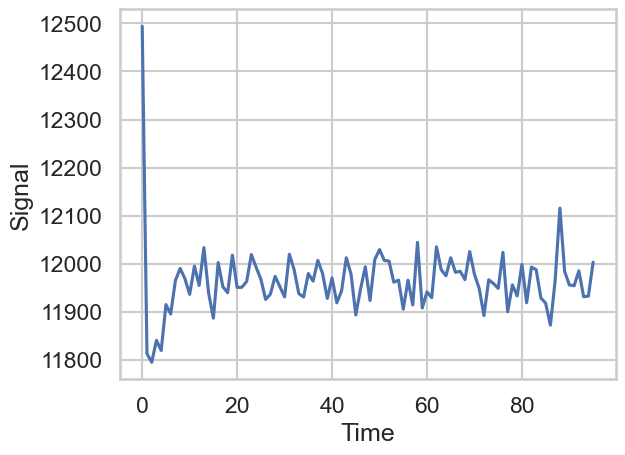

In [39]:
_ = plt.plot(fmri[8,8,8,:])
plt.xlabel("Time")
plt.ylabel("Signal")

The signal you are observing shows how the activity of a specific voxel changes throughout time. However, it is not only that. Indeed, fMRI is highly affected by noise. Noise can be introduced due to multiple reasons, such as motion. The head movement, as well as the simple movement caused by the heart beating, introduce noise in the fMRI signal. Correcting for this noise is important when you do some analysis!

It is possible to plot the timecourse of different voxels in one plot, by simply writing multiple plot commands one after the other.

Text(0, 0.5, 'Signal')

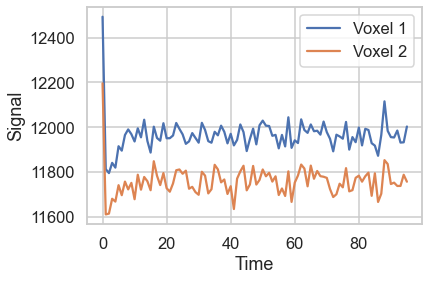

In [7]:
_ = plt.plot(fmri[8,8,8,:], label = "Voxel 1")
_ = plt.plot(fmri[8,9,8,:], label = "Voxel 2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Signal")

-------
### Code here

Now let's try to combine what you learnt before. Create a figure that represents how an axial view of the brain changes throughout time.

Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

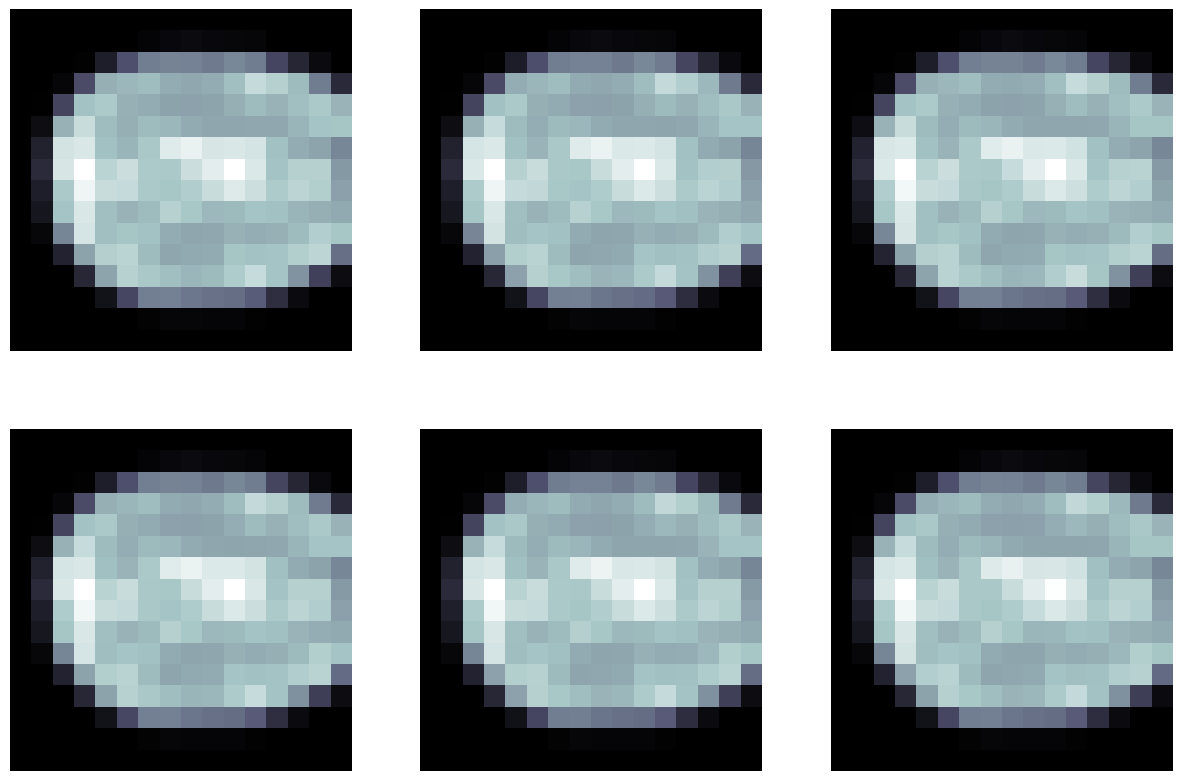

In [46]:
## Code here
plt.figure(figsize = (15, 10))

for i,x in enumerate([5,15,20,25,30,40]):
    plt.subplot(2,3,i+1) # note here, that we have to add 1 to the index, as the index starts at 0 but the subplot number starts at 1
    plt.imshow(fmri[:,:,10,x], cmap='bone')
    plt.axis("off")
    
# what you see here is a slice of the brain over time - what you'll notice is that the image looks pretty much the same over time - that is because the signal that we are measuring is very small compared to the 'contrast' of the image, so on the whole the image looks very similar over time, but there are small changes in the signal that we can measure in our onwards analusis. 
# You can see this by plotting the timecourse of a voxel, as we did above
# you'll also notice that the image is lower resolution than the structural image - this is because the voxel size is larger in fMRI than in sMRI, it needs to be in order to a) reduce the signal to noise ratio and b) to allow us to collect an entire image of the brain at a high enough temporal resolution to measure meaningful changes in the signal in relation to a task we might be asking the participant to do at the same time.

------